In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
import xgboost
import sklearn
import sys
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
features_df = pd.read_csv("st120.csv")
bandgap_gfn1_df = pd.read_csv("mofs_bandgaps_gfn1.csv")
bandgap_pbe_df = pd.read_csv("mofs_bandgaps_pbe.csv")
bandgap_hse_df = pd.read_csv("mofs_bandgaps_hse.csv")

merged_df = features_df.merge(bandgap_gfn1_df, on="mof_name", how="left")
merged_df = merged_df.merge(bandgap_pbe_df, on="mof_name", how="left")
merged_df = merged_df.merge(bandgap_hse_df, on="mof_name", how="left")

merged_df["delta_pbe"] = merged_df["bandgap_pbe"] - merged_df["bandgap_gfn1"]
merged_df["delta_hse"] = merged_df["bandgap_hse"] - merged_df["bandgap_gfn1"]

print(len(features_df.columns))

136


In [14]:
feature_cols = [col for col in merged_df.columns if col not in 
                ['mof_name', 'bandgap_gfn1', 'bandgap_pbe', 'bandgap_hse', 'delta_pbe', 'delta_hse']]

# Features and target
X = merged_df[feature_cols].fillna(0)
y = merged_df['bandgap_gfn1']

# Run t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

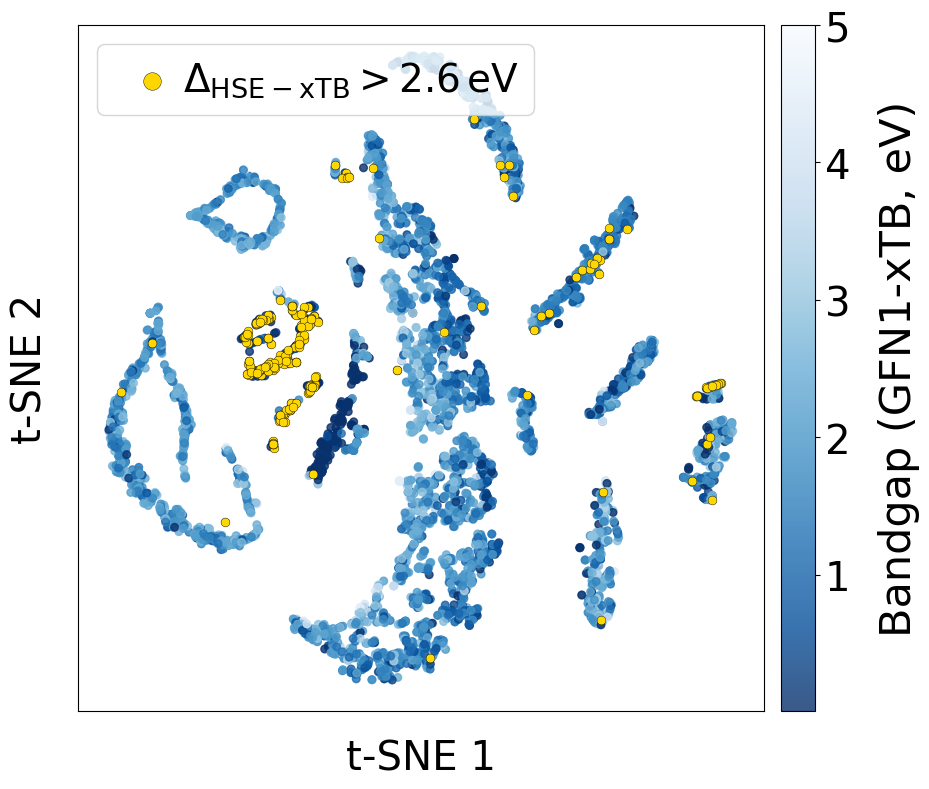

<Figure size 640x480 with 0 Axes>

In [38]:
# Create a mask for points where delta_hse > threshold
mask = (merged_df["delta_hse"] > 2.62) 

fig, ax = plt.subplots(figsize=(9.5, 8))

# Plotting the t-SNE
scatter = plt.scatter(X_embedded[~mask, 0], X_embedded[~mask, 1], c=y[~mask], cmap='Blues_r', s=30, alpha=0.8,vmax=5)

# Plot points with delta_hse > threshold in black
plt.scatter(X_embedded[mask, 0], X_embedded[mask, 1], color='gold',edgecolor='k',linewidth=0.3, 
            s=40, alpha=1, label=r'$\Delta_{\mathrm{HSE-xTB}} > 2.6\,\mathrm{eV}$')

cb = fig.colorbar(scatter, ax=ax, pad=0.02, shrink=1)
cb.set_label('Bandgap (GFN1-xTB, eV)', fontsize=31,labelpad=20)
cb.ax.tick_params(labelsize=29)  
plt.xlabel('t-SNE 1',fontsize=29,labelpad = 20)
plt.ylabel('t-SNE 2',fontsize=29, labelpad=20)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=28,loc='upper left', handletextpad=-0.2, markerscale=2)
#ax.text(-84, -68, 'Stoichiometric-135', fontsize=18, color='k')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.subplots_adjust(bottom=0.12)  # default is ~0.1; increase to add more space
#fig.savefig('plot1c.png',bbox_inches='tight', pad_inches=0.1, dpi=300)
fig.savefig('plot1c.png', dpi=300)

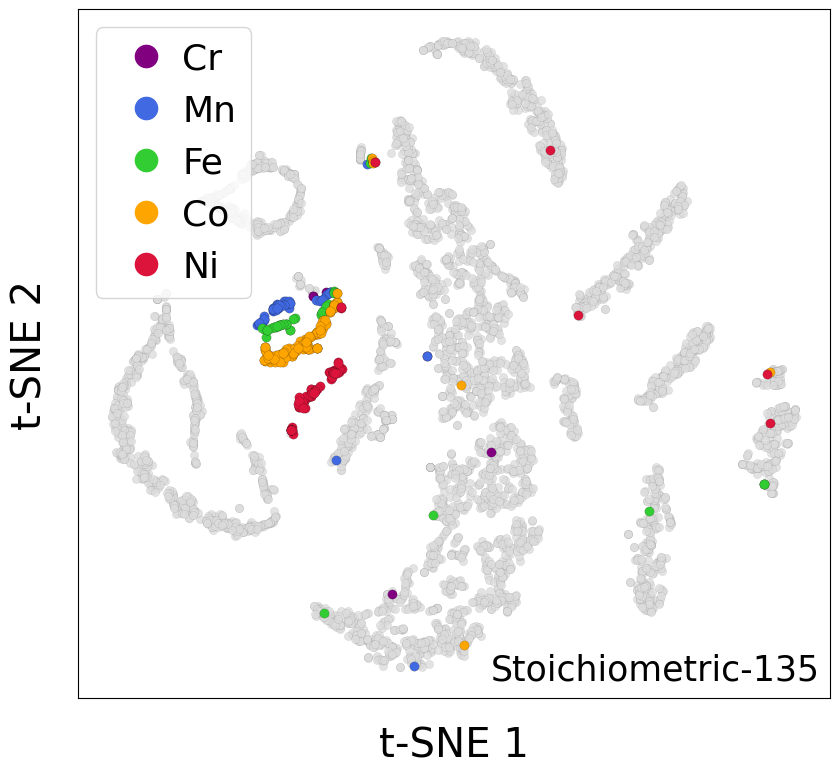

In [50]:
import matplotlib.patches as mpatches

features_to_plot = ['Cr fraction', 'Mn fraction', 'Fe fraction', 'Co fraction', 'Ni fraction']
thresholds = [0,0,0,0,0] 
colors = ['purple', 'royalblue', 'limegreen', 'orange','crimson']

mask_any = np.zeros(len(merged_df), dtype=bool)

fig, ax = plt.subplots(figsize=(8.5, 8))

plt.scatter(X_embedded[~mask_any, 0], X_embedded[~mask_any, 1],color='gainsboro', s=35, alpha=0.8,edgecolor='k',linewidth=0.05)

# Visualise the MOFs with Cr, Mn, Fe, Co, Ni
for feature, thresh, color in zip(features_to_plot, thresholds, colors):
    mask = merged_df[feature] > thresh
    mask_any = mask_any | mask 
    ax.scatter(X_embedded[mask, 0], X_embedded[mask, 1],facecolors=color, edgecolors='k', s=45, linewidths=0.1,label=f'{feature[:2]}')

legend_handles = []
for feature, thresh, color in zip(features_to_plot, thresholds, colors):
    patch = plt.Line2D([0], [0], marker='o', color='w', label=f'{feature[:2]}',
                       markerfacecolor=color, markeredgecolor=color, markersize=10, linewidth=1.5)
    legend_handles.append(patch)

ax.legend(handles=legend_handles, fontsize=26, loc='upper left', handletextpad=0,markerscale=1.6)
    
plt.xlabel('t-SNE 1',fontsize=29,labelpad=20)
plt.ylabel('t-SNE 2',fontsize=29, labelpad=20)
plt.xticks([])
plt.yticks([])
plt.grid(True)
plt.tight_layout()
ax.text(11, -68, 'Stoichiometric-135', fontsize=25, color='k')
plt.subplots_adjust(bottom=0.12)  # default is ~0.1; increase to add more space
plt.show()
fig.savefig('plot1d.png', dpi=300)

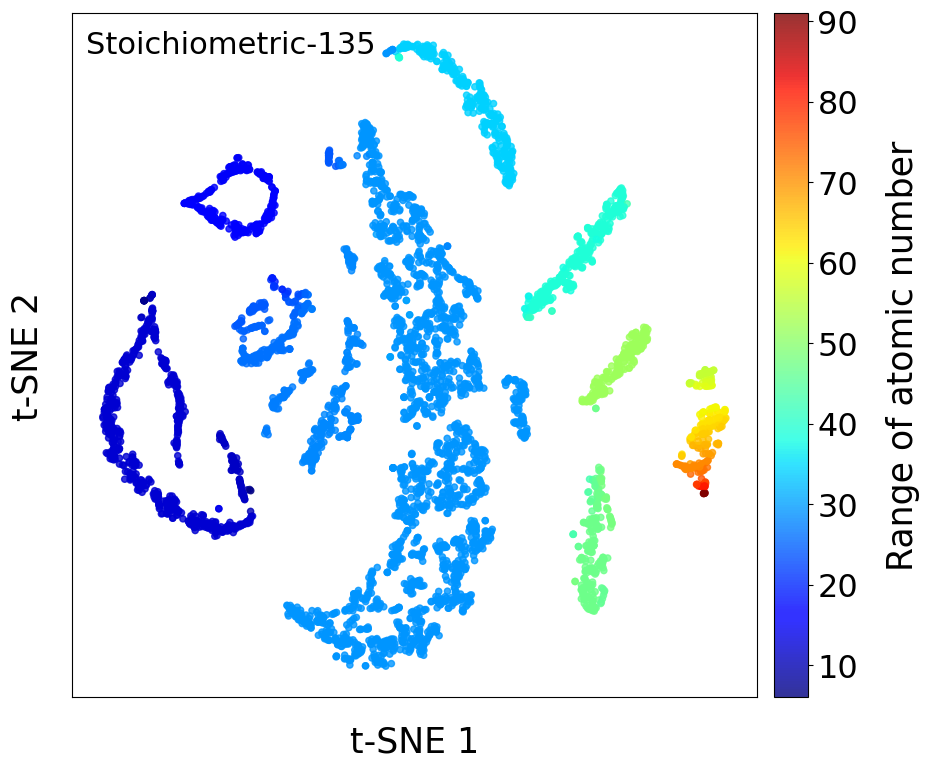

In [51]:
fig, ax = plt.subplots(figsize=(9.5, 8))

scatter = ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=merged_df['range Number'], cmap='jet', s=20, alpha=0.8)
cb = fig.colorbar(scatter, ax=ax, pad=0.02, shrink=1)  
cb.set_label('Range of atomic number', fontsize=25,labelpad=20)
cb.ax.tick_params(labelsize=23) 

plt.xlabel('t-SNE 1',fontsize=25,labelpad=20)
plt.ylabel('t-SNE 2',fontsize=25, labelpad=20)
plt.xticks([])
plt.yticks([])
plt.grid(True)
plt.tight_layout()
ax.text(-84, 76, 'Stoichiometric-135', fontsize=22, color='k')
plt.subplots_adjust(bottom=0.12) 
plt.show()
fig.savefig('tsne_range_number.png', dpi=300)